In [5]:
#!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [6]:
!pip install anvil-uplink

In [7]:
import anvil.server

In [8]:
anvil.server.connect("BIORY47T4WFDI2QFOHAEAV4Y-K2L7QDB2BX3UIAU2")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


In [9]:
from fastbook import *
from fastai.vision.widgets import *


In [6]:
!pip install jmd_imagescraper

from jmd_imagescraper.core import *
from pathlib import Path

root = Path().cwd()/"ice creams"

duckduckgo_search(root, "Vanilla", "Vanilla ice cream", max_results=200)
duckduckgo_search(root, "Chocolate", "Chocolate ice cream", max_results=200)
duckduckgo_search(root, "Strawberry", "Strawberry ice cream", max_results=200)
duckduckgo_search(root, "Mango", "Mango ice cream", max_results=200)

Duckduckgo search: Vanilla ice cream


Duckduckgo search: Chocolate ice cream


Duckduckgo search: Strawberry ice cream


Duckduckgo search: Mango ice cream


[Path('/content/ice creams/Mango/001_b80ca501.jpg'),
 Path('/content/ice creams/Mango/002_7e251718.jpg'),
 Path('/content/ice creams/Mango/003_ce8ba26c.jpg'),
 Path('/content/ice creams/Mango/004_8b637fb0.jpg'),
 Path('/content/ice creams/Mango/005_c635eeb5.jpg'),
 Path('/content/ice creams/Mango/006_bc9412a5.jpg'),
 Path('/content/ice creams/Mango/007_02e87543.jpg'),
 Path('/content/ice creams/Mango/008_cc299dd9.jpg'),
 Path('/content/ice creams/Mango/009_8d09cde3.jpg'),
 Path('/content/ice creams/Mango/010_5e953bb8.jpg'),
 Path('/content/ice creams/Mango/011_9dc7b43a.jpg'),
 Path('/content/ice creams/Mango/012_59cfeff8.jpg'),
 Path('/content/ice creams/Mango/013_1354d152.jpg'),
 Path('/content/ice creams/Mango/014_a8aede40.jpg'),
 Path('/content/ice creams/Mango/015_e04c7a34.jpg'),
 Path('/content/ice creams/Mango/016_902ed966.jpg'),
 Path('/content/ice creams/Mango/017_726e4e07.jpg'),
 Path('/content/ice creams/Mango/018_2138445c.jpg'),
 Path('/content/ice creams/Mango/019_74f43d9a.

In [10]:
path = Path('ice creams')
fns = get_image_files(path)
fns

(#796) [Path('ice creams/Chocolate/190_c0729b85.jpg'),Path('ice creams/Chocolate/146_6487cc6c.jpg'),Path('ice creams/Chocolate/044_3e0a8e01.jpg'),Path('ice creams/Chocolate/128_e677994d.jpg'),Path('ice creams/Chocolate/194_631e0de0.jpg'),Path('ice creams/Chocolate/072_43d01e33.jpg'),Path('ice creams/Chocolate/031_2fa53ae0.jpg'),Path('ice creams/Chocolate/049_c1b07003.jpg'),Path('ice creams/Chocolate/075_07243207.jpg'),Path('ice creams/Chocolate/200_981f128c.jpg')...]

In [30]:
failed = verify_images(fns)
failed

(#0) []

In [29]:
failed.map(Path.unlink);

In [11]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [12]:
icecreams = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [13]:
dls = icecreams.dataloaders(path)

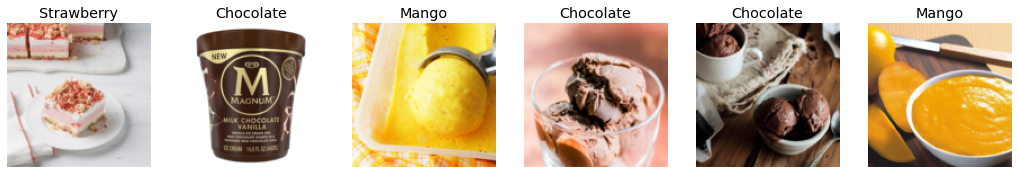

In [14]:
dls.valid.show_batch(max_n=6, nrows=1)

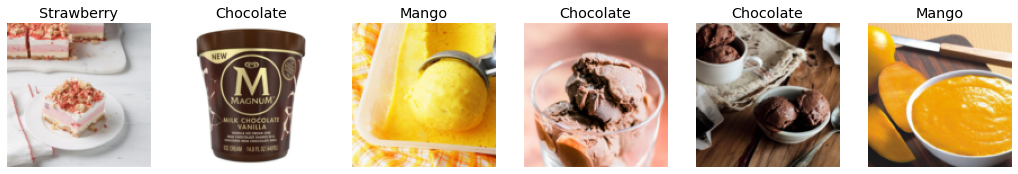

In [15]:
icecreams = icecreams.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = icecreams.dataloaders(path)
dls.valid.show_batch(max_n=6, nrows=1)

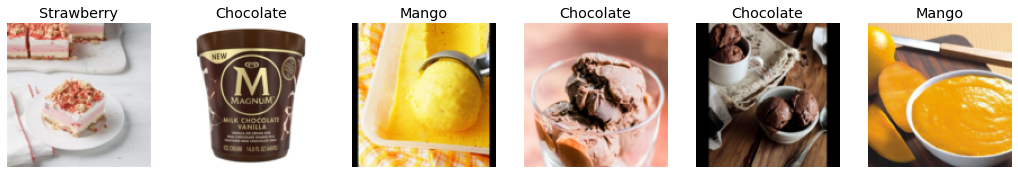

In [16]:
icecreams = icecreams.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = icecreams.dataloaders(path)
dls.valid.show_batch(max_n=6, nrows=1)

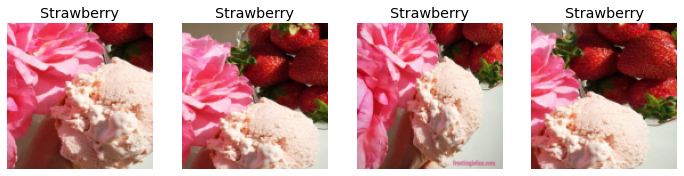

In [17]:
icecreams = icecreams.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = icecreams.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

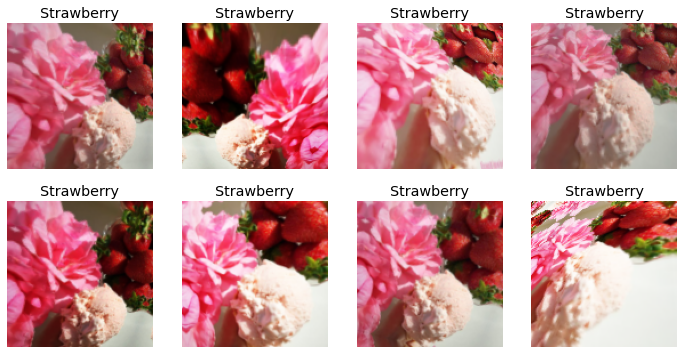

In [18]:
icecreams = icecreams.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = icecreams.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [19]:
icecreams = icecreams.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = icecreams.dataloaders(path)

In [20]:
icecreams = icecreams.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = icecreams.dataloaders(path)

In [24]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

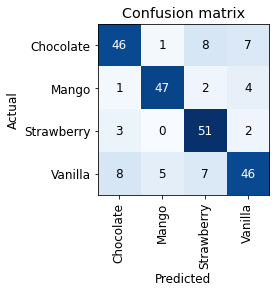

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


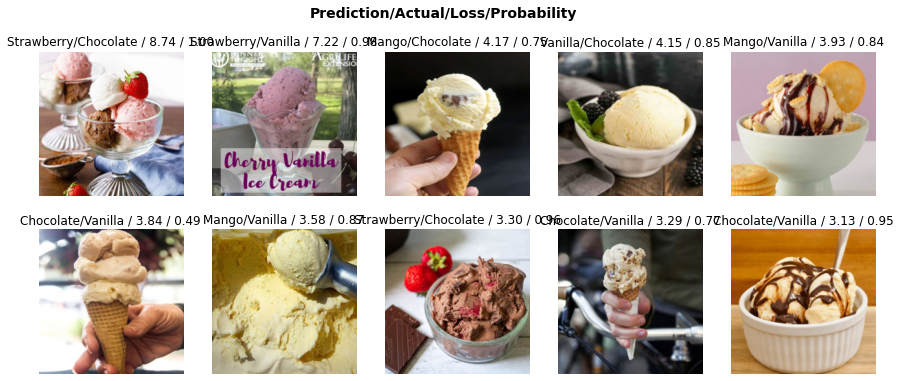

In [109]:
interp.plot_top_losses(10, nrows=2)

In [91]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [94]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [95]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [26]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [27]:
img = PILImage.create(btn_upload.data[-1])
pred,pred_idx,probs = learn.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Mango; Probability: 1.0000')

In [28]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [29]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [30]:
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [31]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Mango; Probability: 1.0000')

In [32]:
VBox([widgets.Label('Choose your ice cream!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [33]:
learn.export()

In [34]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [35]:
learn_inf = load_learner(path/'export.pkl')

In [36]:
learn_inf.predict('/content/images/035.-Mango-Ice-Cream_545x545.png')

('Mango', tensor(1), tensor([2.1030e-05, 9.9997e-01, 9.4203e-06, 2.9489e-06]))

In [ ]:
@anvil.server.callable
def predict(sepal_length, sepal_width, petal_length, petal_width):
  classification = knn.predict([[sepal_length, sepal_width, petal_length, petal_width]])
  return iris.target_names[classification][0]

In [ ]:
anvil.server.wait_forever()

KeyboardInterrupt: ignored